# Homework 3

## Christopher Calizzi and Nathan Hardham

## Normal and t distributions
## t-test


An experiment was conducted to determine the effect of children participating in a given meal preparation on calorie intake for that meal. Data are recorded below. 

Save the data to a format that can be read into python. Read the data in for analysis. Data is provided in two separted CSV files. 

* Use python to calculate the quantities and generate the visual summaries requested below. You will lose points if you are not utilizing python.

* You can use scipy libary or other libraries to do your tests or you can implement them from scratch in python 



In [27]:
# Standard Headers
# You are welcome to add additional headers here if you wish
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt

# Enable inline mode for matplotlib so that Jupyter displays graphs
%matplotlib inline
participants_file = """230.16
210.99
288.73
590.28
582.59
635.21
249.86
441.66
572.43
357.78
396.79
298.38
282.99
368.51
388.59
256.32
408.82
424.94
477.96
428.74
432.52
428.27
596.79
456.30
446.38"""
parts = participants_file.split()
newparts = []
for p in parts:
    newparts.append(float(p))
participants = np.array(newparts)

non_participants_file = """614.61
503.46
425.22
688.77
184.00
299.73
350.65
394.94
261.55
295.28
139.69
462.78
179.59
301.75
436.58
371.39
469.02
378.09
287.31
448.55
332.64
403.98"""
nonparts = non_participants_file.split()
newnonparts = []
for p in nonparts:
    newnonparts.append(float(p))
nonparticipants = np.array(newnonparts)
nonparticipantsNoNan = nonparticipants
for x in range(3):
    nonparticipants = np.append(nonparticipants, [np.nan])




# Question - 1
Summarize the data by whether children participated in the meal preparation or not. Use an appropriately labelled table to show the results. Also include a graphical presentation that shows the distribution of calories for participants vs. non-participants. Describe the shape of each distribution and comment on the similarity (or lack thereof) between the distributions in each population. **(2 points)**


    Nonparticipants  Participants
0            614.61        230.16
1            503.46        210.99
2            425.22        288.73
3            688.77        590.28
4            184.00        582.59
5            299.73        635.21
6            350.65        249.86
7            394.94        441.66
8            261.55        572.43
9            295.28        357.78
10           139.69        396.79
11           462.78        298.38
12           179.59        282.99
13           301.75        368.51
14           436.58        388.59
15           371.39        256.32
16           469.02        408.82
17           378.09        424.94
18           287.31        477.96
19           448.55        428.74
20           332.64        432.52
21           403.98        428.27
22              NaN        596.79
23              NaN        456.30
24              NaN        446.38


<AxesSubplot:title={'center':'Number of Calories Consumed by Nonparticipants'}, xlabel='Nonparticipants', ylabel='Number of Calories'>

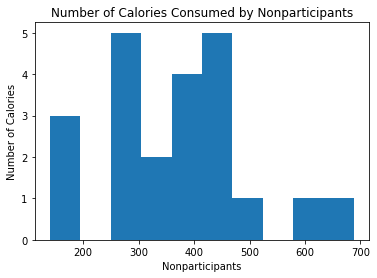

In [19]:
# Add your code or descriptions here
combined = pd.DataFrame({'Nonparticipants':nonparticipants, 'Participants': participants})
print(combined)
nonp_hist = combined["Nonparticipants"].plot.hist(title = "Number of Calories Consumed by Nonparticipants")
nonp_hist.set_xlabel("Nonparticipants")
nonp_hist.set_ylabel("Number of Calories")
nonp_hist

<AxesSubplot:title={'center':'Number of Calories Consumed by Participants'}, xlabel='Participants', ylabel='Number of Calories'>

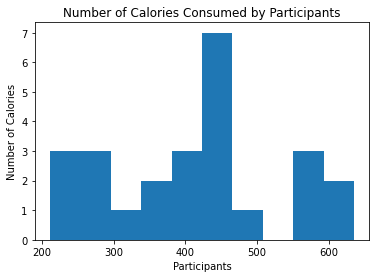

In [21]:
p_hist = combined["Participants"].plot.hist(title = "Number of Calories Consumed by Participants")
p_hist.set_xlabel("Participants")
p_hist.set_ylabel("Number of Calories")
p_hist

The nonparticipants distribution is bimodal with means at 280 and 440 calories consumed. The participants distribution is relatively normal with a mean around 450. The data for participants appears to be slightly greater than that for non-participants however this relationship is not totally clear. The participants distribution also appears to have greater variance than the non-participants distribution. The participants distribution is slightly skewed left.

# Question - 2 

Does the mean calorie consumption for those who participated in the meal preparation differ from **425**? Formally test at the $\alpha = 0.05$ level using the 5 steps outlined in the module. **(6 points)**


1. null-hypothesis: Mean calorie consumption for participants does not differ from 425
alternate-hypothesis: Mean calorie consumption for participants differs from 425

Alpha - 0.05

2. Appropriate test statistic is T because the sample size is less than 30 and the distribution of the means is not necessarily normally distributed unless the sample size is greater than 30.

3. If p<0.05 (t>1.895) then the null hypothesis can be rejected


4. See Below

In [30]:
# Add your code or descriptions here 
t = sp.stats.ttest_1samp(participants, 425, alternative = 'two-sided')
print(t)



Ttest_1sampResult(statistic=-0.6139385690489593, pvalue=0.5450319510318798)


5. The pvalue is greater than 0.05, therefore the null hypothesis cannot be rejected and the participant mean cannot be concluded to be different than 425

# Question -3 
Calculate a **90%** confidence interval for the mean calorie intake for participants in the meal preparation. Interpret the confidence interval. **(6 points)**

In [4]:
# Add your code or descriptions here 

In [37]:
mean, s = np.mean(participants), np.std(participants)
conf_int = stats.norm.interval(0.9,loc = mean, scale = s/(len(participants)**0.5))
print(conf_int)

(370.91277009328104, 449.24642990671884)


If the study were to be repeated a number of times, 90% of the time the mean calorie intake would be between 370.913 and 449.262.

# Question 4 
Formally test whether or not participants consumed 
more calories than non-participants at the $\alpha = 0.05$ level using the 5 steps procedure for hypothesis tests. **(6 points )**

1. null-hypothesis: Calorie consumption for participants is not greater than non-participant calorie consumption. alternate-hypothesis: Calorie consumption for participants is greater than non-participant calorie consumption.    Alpha - 0.05

2. Appropriate test statistic is T because the sample size is less than 30 and the distribution of the means is not necessarily normally distributed unless the sample size is greater than 30.

3. If p<0.05 (t>1.895) then the null hypothesis can be rejected


4. See Below

In [38]:
t = sp.stats.ttest_ind(participants, nonparticipantsNoNan, equal_var = False, nan_policy = 'omit',alternative = 'greater')
print(t)

Ttest_indResult(statistic=0.9636038701588588, pvalue=0.17032249438595926)


5. The pvalue is greater than 0.05, therefore the null hypothesis cannot be rejected and it cannot be concluded that participants consume more calories than non-participants.